Thành viên
52100898 - Lê Hoàng Khang
52100894 - Lý Hoàng Gia Huy
52100263 - Dương Hải Minh

In [426]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [427]:
df = pd.read_csv("./titanic/train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [428]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate(y_true, y_pred):

    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    
    evaluation_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }
    return evaluation_metrics

# 1. Data Preprocessing

## Data Describe

In [429]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


0    549
1    342
Name: Survived, dtype: int64


<Axes: >

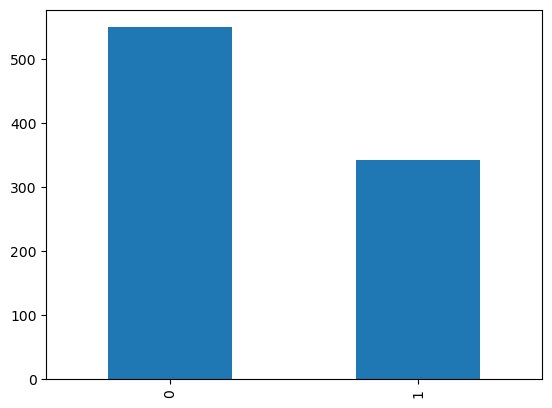

In [430]:
g = df['Survived'].value_counts()
print(g)
g.plot.bar()

In [431]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print('Categorical features:', categorical_cols)
print('Numerical features:', numerical_cols)

Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


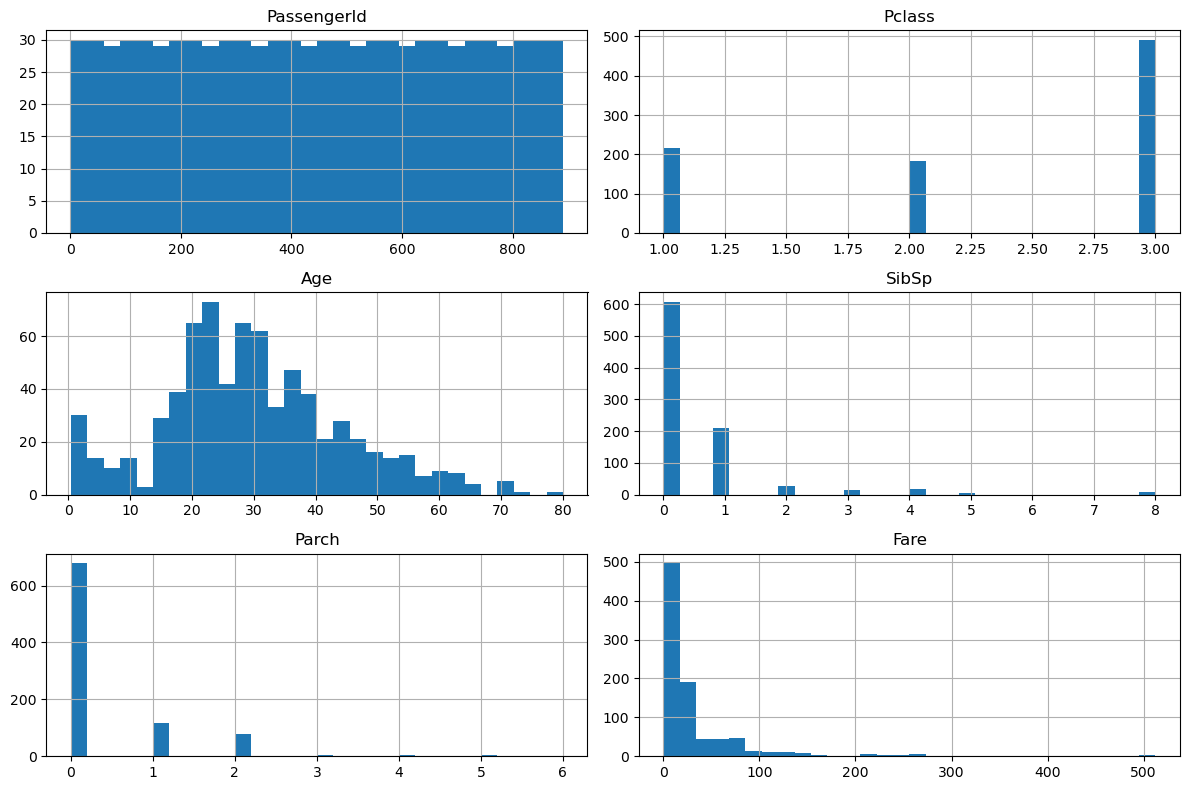

In [432]:
tmp = numerical_cols.copy()
tmp.remove('Survived')
df[tmp].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

## Missing values handling

In [433]:
#check missing values
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [434]:
from sklearn.impute import SimpleImputer
# Fill missing values of categorical column with the most frequent value and numerical with the mean value

imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_cols:
    df[col] = imputer.fit_transform(df[[col]])

imputer = SimpleImputer(strategy='mean')
for col in numerical_cols:
    df[col] = imputer.fit_transform(df[[col]])

In [435]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Categorical Encoding

In [436]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])

In [437]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108,1,22.0,1.0,0.0,523,7.2500,47,2
1,2.0,1.0,1.0,190,0,38.0,1.0,0.0,596,71.2833,81,0
2,3.0,1.0,3.0,353,0,26.0,0.0,0.0,669,7.9250,47,2
3,4.0,1.0,1.0,272,0,35.0,1.0,0.0,49,53.1000,55,2
4,5.0,0.0,3.0,15,1,35.0,0.0,0.0,472,8.0500,47,2


## Feature Scaling

In [438]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_categorical_data = scaler.fit_transform(df[categorical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=[numerical_cols])

for i in range(len(categorical_cols)):
    scaled_df[categorical_cols[i]] = scaled_categorical_data[:,i]

In [439]:
scaled_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,0.121348,1.0,0.769118,0.321918,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.213483,0.0,0.876471,0.554795,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.396629,0.0,0.983824,0.321918,1.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,0.305618,0.0,0.072059,0.376712,1.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,0.016854,1.0,0.694118,0.321918,1.0


In [440]:
X = scaled_df.drop('Survived', axis=1, level=0)
y = scaled_df['Survived']

## Feature Importance

In [441]:
# Using importance score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X.values, y.values.reshape(-1))

RandomForestRegressor()

In [442]:
importance_scores = model.feature_importances_
print("Feature: Score")
for feature, score in zip(X.columns, importance_scores):
    print(f"{feature}: {score}")

Feature: Score
('PassengerId',): 0.09257885570657162
('Pclass',): 0.08655143757114922
('Age',): 0.10438138821652417
('SibSp',): 0.028907252032941196
('Parch',): 0.010282709512772208
('Fare',): 0.09172343399056677
('Name',): 0.11366754567440672
('Sex',): 0.2946929750741661
('Ticket',): 0.12384409702973431
('Cabin',): 0.03823450998832959
('Embarked',): 0.01513579520283805


# Các đặc trưng của dataset Titanic
### PassengerId:
Chỉ mục duy nhất cho mỗi hành khách, không mang thông tin quan trọng trong việc phân loại hành khách sống hay chết trên tàu.
### Survived: target
Biến mục tiêu mà chúng ta muốn dự đoán, cho biết hành khách đã sống sót (1) hay không (0).
### Pclass:
Đánh giá địa vị xã hội và địa vị kinh tế của hành khách. Có thể quan trọng vì những hành khách ở tầng lớp cap có thể được ưu tiên cứu hộ.
### Name:
Tên của hành khách. Thông tin này không đóng vai trò quan trọng đến việc sống sót hay chết.
### Sex:
Giới tính của hành khách. Đây là một đặc trưng quan trọng để dự đoán khả năng sống sót, vì phụ nữ thường được ưu tiên khi cứu hộ.
### Age:
Tuổi của hành khách. Đặc trưng này có thể liên quan đến khả năng sống sót, vì trẻ em và người cao tuổi có thể được ưu tiên hơn trong quá trình cứu hộ.
### SibSp và Parch:
Số lượng anh chị em, vợ chồng, cha mẹ và con cái đi kèm trên tàu. Đặc trưng này có thể ảnh hưởng đến khả năng sống sót, vì có thể có sự hỗ trợ từ gia đình trong quá trình cứu hộ.
### Ticket:
Số vé của hành khách. Đặc trưng này có thể không mang thông tin quan trọng cho việc phân loại.
### Fare:
Giá vé. Không có mối liên hệ rõ ràng với khả năng sống sót
### Cabin:
Số cabin của hành khách. Có thể không ảnh hưởng quá nhiều đến kết quả phân loại vì có nhiều giá trị bị thiếu.
### Embarked:
Cảng lên tàu của hành khách. Đặc trưng này có thể không có tác động lớn đến khả năng sống sót.

## Split data

In [443]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(623, 11)
(623,)


# 2. Basic Model in Machine Learning

## KNN

In [444]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [445]:
y_pred = knn.predict(X_test)

knn_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0.]


## Naives Bayes

In [446]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [447]:
y_pred = gnb.predict(X_test)

gnb_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0.]


## Descision Tree

In [448]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [449]:
y_pred = tree.predict(X_test)

tree_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1.]


## Support Vector Machine

In [450]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', C= 0.05)
svm.fit(X_train, y_train)

SVC(C=0.05, kernel='poly')

In [451]:
y_pred = svm.predict(X_test)

svm_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0.]


## Ensemble learning

In [452]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

### Adaptive Boosting

In [453]:
# boost decision tree model
ada = AdaBoostClassifier(
    estimator=tree, # based weak learner
    n_estimators=50, # numer of weak learners in AdaBoost chain
    random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [454]:
y_pred = ada.predict(X_test)

ada_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1.]


### Gradient Boosting

In [455]:
grad = GradientBoostingClassifier(
    n_estimators=195, # numer of weak learners in Gradient Boosting chain
    random_state=42
)
grad.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=195, random_state=42)

In [456]:
y_pred = grad.predict(X_test)

grad_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0.]


### Random forest

In [457]:
forest = RandomForestClassifier(
    n_estimators=50, # number of trees in forest
    random_state=42
)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [458]:
y_pred = forest.predict(X_test)

forest_eva = evaluate(y_test, y_pred)
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0.]


# 3. Use Neural Network in Machine Learning

In [459]:
import tensorflow as tf

## Feed Forward Neural Network

In [460]:
fnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [461]:
fnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fnn.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6164
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7528
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7865
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7945
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7865
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.7945
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8106
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8138
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8138
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8154
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.9101
Epoch 83/100
20/20 [==============================] - 0s 1000us/step - loss: 0.2386 - accuracy: 0.9085
Epoch 84/100
20/20 [==============================] - 0s 1000us/step - loss: 0.2414 - accuracy: 0.8973
Epoch 85/100
20/20 [==============================] - 0s 947us/step - loss: 0.2402 - accuracy: 0.8989
Epoch 86/100
20/20 [==============================] - 0s 895us/step - loss: 0.2364 - accuracy: 0.9085
Epoch 87/100
20/20 [==============================] - 0s 950us/step - loss: 0.2371 - accuracy: 0.9117
Epoch 88/100
20/20 [==============================] - 0s 1000us/step - loss: 0.2344 - accuracy: 0.9085
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9021
Epoch 90/100
20/20 [==============================] - 0s 947us/step - loss: 0.2331 - accuracy: 0.9117
Epoch 91/100
20/20 [==============================] - 0s 948us/step - loss: 0.2329 - accuracy: 0

In [462]:
y_pred = fnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

fnn_eva = evaluate(y_test, y_pred)
print(y_pred)

9/9 [==============================] - 0s 875us/step
[0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 1]


## Reccurent Neural Network

In [463]:
rnn = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=2, output_dim=16, input_length=X_train.shape[1]),
    tf.keras.layers.SimpleRNN(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [464]:
rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6261 - accuracy: 0.6292
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7833
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7705
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8026
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8074
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7961
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8026
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8202
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8202
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.8138
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8218
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8218
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8218
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8218
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8218
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8218
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8218
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8218
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8218
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8218
Epoch 93/100


In [465]:
y_pred = rnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

rnn_eva = evaluate(y_test, y_pred)
print(y_pred)

9/9 [==============================] - 0s 1ms/step
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


## Models Evaluating

In [466]:
evaluation_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_evaluations = {
    'KNN': knn_eva.values(),
    'Naive Bayes': gnb_eva.values(),
    'Decision Tree': tree_eva.values(),
    'Support Vector Machine': svm_eva.values(),
    'Adaptive Boosting for Decision Tree': ada_eva.values(),
    'Gradient Boosting for Decision Tree': grad_eva.values(),
    'Random Forest' : forest_eva.values(),
    'Feed Forward Neural Network (FNN)' : fnn_eva.values(),
    'Reccurent Neural Network (RNN)' : rnn_eva.values()
}

eva = pd.DataFrame(model_evaluations, index=evaluation_metrics)
print(eva)

            KNN  Naive Bayes  Decision Tree  Support Vector Machine  \
accuracy   0.77         0.79           0.75                    0.79   
precision  0.77         0.79           0.75                    0.79   
recall     0.77         0.79           0.75                    0.79   
f1-score   0.77         0.79           0.75                    0.79   

           Adaptive Boosting for Decision Tree  \
accuracy                                  0.77   
precision                                 0.77   
recall                                    0.77   
f1-score                                  0.77   

           Gradient Boosting for Decision Tree  Random Forest  \
accuracy                                  0.82           0.81   
precision                                 0.83           0.82   
recall                                    0.82           0.81   
f1-score                                  0.82           0.81   

           Feed Forward Neural Network (FNN)  Reccurent Neural Netw

# 4. Avoid overfitting

## Trích chọn các đặc trưng theo ngưỡng đánh giá

In [516]:
X = scaled_df.drop('Survived', axis=1, level=0)
y = scaled_df['Survived']
'''
Feature: Score
('PassengerId',): 0.09242319181047126
('Pclass',): 0.08327093155212285
('Age',): 0.10450236507712829
('SibSp',): 0.02884232195145229
('Parch',): 0.007562341208096018
('Fare',): 0.09334822900089114
('Name',): 0.11951538006584297
('Sex',): 0.29296143631157745
('Ticket',): 0.12611223778310746
('Cabin',): 0.03695193431697542
('Embarked',): 0.014509630922334876
'''
# chọn các đặc trưng có score >= 0.06
features = [feature[0] for feature, score in zip(X.columns, importance_scores) if score >= 0.06]
print(features)
X = scaled_df[features]
y = scaled_df['Survived']
display(X.head())
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), test_size=0.3, random_state=42)

['PassengerId', 'Pclass', 'Age', 'Fare', 'Name', 'Sex', 'Ticket']


,PassengerId,Pclass,Age,Fare,Name,Sex,Ticket
0,0.000000,1.0,0.271174,0.014151,0.121348,1.0,0.769118
1,0.001124,0.0,0.472229,0.139136,0.213483,0.0,0.876471
2,0.002247,1.0,0.321438,0.015469,0.396629,0.0,0.983824
3,0.003371,0.0,0.434531,0.103644,0.305618,0.0,0.072059
4,0.004494,1.0,0.434531,0.015713,0.016854,1.0,0.694118


## Khởi tạo lại các mô hình và điều chỉnh các tham số cần thiết

In [551]:
## KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
## Naive Bayes
gnb = GaussianNB(var_smoothing=0.01)
## Decision Tree
tree = DecisionTreeClassifier(min_samples_split=2, max_depth=3)
## Support Vector Machine
svm = SVC(kernel='poly', C= 0.05)
## Adaptive Boosting
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=42)
## Gradient Boosting
grad = GradientBoostingClassifier(n_estimators=195, random_state=42, max_depth=3)
## Random Forest
forest = RandomForestClassifier(n_estimators=50, random_state=42)
## Feed Forward Neural Network
fnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
fnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## Reccurent Neural Network
rnn = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=2, output_dim=16, input_length=X_train.shape[1]),
    tf.keras.layers.SimpleRNN(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])
rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Sử dụng k-Fold cross validation để train và áp dụng các tham số early stopping khi cần

In [552]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
# train
for train_idx, valid_idx in kf.split(X_train):
    X_t, X_v = X.iloc[train_idx].values, X.iloc[valid_idx].values
    y_t, y_v = y.iloc[train_idx].values.reshape(-1), y.iloc[valid_idx].values.reshape(-1)
    # tiến hành fit
    ## KNN
    knn.fit(X_t, y_t)
    ## Naive Bayes
    gnb.fit(X_t, y_t)
    ## Decision Tree
    tree.fit(X_t, y_t)
    ## Support Vector Machine
    svm.fit(X_t, y_t)
    ## Adaptive Boosting
    ada.fit(X_t, y_t)
    ## Gradient Boosting
    grad.fit(X_t, y_t)
    ## Random Forest
    forest.fit(X_t, y_t)
    ## Feed Forward Neural Network
    fnn.fit(X_t, y_t, epochs=100, batch_size=32, verbose=0, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10))
    ## Reccurent Neural Network
    rnn.fit(X_t, y_t, epochs=100, batch_size=32, verbose=0, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10))

## Test lại với các mô hình

In [553]:
# KNN
y_pred = knn.predict(X_test)
knn_eva = evaluate(y_test, y_pred)
# Naive Bayes
y_pred = gnb.predict(X_test)
gnb_eva = evaluate(y_test, y_pred)
# Decision Tree
y_pred = tree.predict(X_test)
tree_eva = evaluate(y_test, y_pred)
# Support Vector Machine
y_pred = svm.predict(X_test)
svm_eva = evaluate(y_test, y_pred)
# Adaptive Boosting
y_pred = ada.predict(X_test)
ada_eva = evaluate(y_test, y_pred)
# Gradient Boosting
y_pred = grad.predict(X_test)
grad_eva = evaluate(y_test, y_pred)
# Random Forest
y_pred = forest.predict(X_test)
forest_eva = evaluate(y_test, y_pred)
# Feed Forward Neural Network
y_pred = np.argmax(fnn.predict(X_test), axis=1)
fnn_eva = evaluate(y_test, y_pred)
# Reccurent Neural Network
y_pred = np.argmax(rnn.predict(X_test), axis=1)
rnn_eva = evaluate(y_test, y_pred)

# Evaluation
evaluation_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_evaluations = {
    'KNN': knn_eva.values(),
    'Naive Bayes': gnb_eva.values(),
    'Decision Tree': tree_eva.values(),
    'Support Vector Machine': svm_eva.values(),
    'Adaptive Boosting for Decision Tree': ada_eva.values(),
    'Gradient Boosting for Decision Tree': grad_eva.values(),
    'Random Forest' : forest_eva.values(),
    'Feed Forward Neural Network (FNN)' : fnn_eva.values(),
    'Reccurent Neural Network (RNN)' : rnn_eva.values()
}

eva = pd.DataFrame(model_evaluations, index=evaluation_metrics)
print(eva)

9/9 [==============================] - 0s 1ms/step
            KNN  Naive Bayes  Decision Tree  Support Vector Machine  \
accuracy   0.94         0.79           0.83                    0.79   
precision  0.94         0.79           0.83                    0.79   
recall     0.94         0.79           0.83                    0.79   
f1-score   0.94         0.79           0.83                    0.79   

           Adaptive Boosting for Decision Tree  \
accuracy                                  0.95   
precision                                 0.95   
recall                                    0.95   
f1-score                                  0.95   

           Gradient Boosting for Decision Tree  Random Forest  \
accuracy                                  0.90           0.96   
precision                                 0.91           0.96   
recall                                    0.90           0.96   
f1-score                                  0.90           0.96   

           Feed 